In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

 **This problem focuses on the collinearity problem.
(a) Perform the following commands in R :**

> set.seed(1)

> x1=runif(100)

> x2=0.5*x1+rnorm(100)/10

> y=2+2*x1+0.3*x2+rnorm(100)

The last line corresponds to creating a linear model in which y is
a function of x1 and x2 . Write out the form of the linear model.
What are the regression coefficients?

In [2]:
np.random.seed(1)
x1 = np.random.uniform(low = 0,high = 1,size = 100)
x2 =0.5 * x1 +  np.random.normal(loc = 0.0, scale = 1.0, size = 100)/10
y = 2 + 2 * x1 + 0.3 * x2 +  np.random.normal(loc = 0.0, scale = 1.0, size = 100)

线性模型 y = 2 + 2 * x1 + 0.3 * x2 + eps，回归系数β0  = 2，β1 = 2，β2 = 0.3

**(b) What is the correlation between x1 and x2 ? Create a scatterplot
displaying the relationship between the variables.**

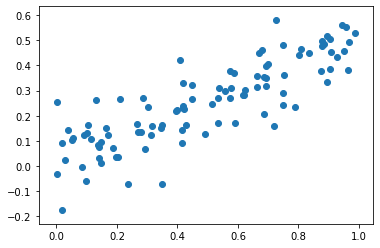

In [3]:
#β0 = 0,β1 = 0.5
plt.scatter(x1,x2)
plt.show()

**(c) Using this data, fit a least squares regression to predict y using
x1 and x2 . Describe the results obtained. What are
ˆ
β 0 ,
ˆ
β 1 , and
ˆ
β 2 ? How do these relate to the true β 0 , β 1 , and β 2 ? Can you
reject the null hypothesis H 0 : β 1 = 0? How about the null
hypothesis H 0 : β 2 = 0?**

In [4]:
data = pd.DataFrame({'x1':x1,'x2':x2,'y':y})
result_smf = smf.ols('y ~ x1 + x2',data).fit()
result_smf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           4.40e-07
Time:                        10:18:06   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      0.000       1.795       2.584
x1             0.7046      0.637      1.107      0.271      -0.559       1.968
x2             2.5024      1.140      2.194      0.031       0.239       4.766
==============================================================================
Omnibus:                        0.607   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.577
Skew:                          -0.179   Prob(JB):                        0.749
Kurtosis:                       2.900   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 ˆβ0 , ˆβ1 , ˆβ2 分别为2.1893、0.7046、2.5024， ˆβ0接近β0，但 ˆβ1 , ˆβ2与 β1 , β2相差较大，实际为 ˆβ1+0.5*ˆβ2迫近β1+0.5*β2（因x2 = 0.5 * x1 +  eps）,从p值可见不能拒绝0假设（the null hypothesis）H 0 : β 1 = 0，但相对可以拒绝0假设（the null hypothesis）H 0 : β 2 = 0

**(d) Now fit a least squares regression to predict y using only x1 .
Comment on your results. Can you reject the null hypothesis
H 0 : β 1 = 0?**

In [5]:
result_smf_x1 = smf.ols('y ~ x1',data).fit()
result_smf_x1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           6.68e-07
Time:                        10:18:06   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.000       1.850       2.647
x1             1.8770      0.353      5.316      0.000       1.176       2.578
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.468
Skew:                          -0.003   Prob(JB):                        0.791
Kurtosis:                       2.665   Cond. No.                         4.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**可以拒绝零假设H 0 : β 1 = 0**

**(e) Now fit a least squares regression to predict y using only x2 .
Comment on your results. Can you reject the null hypothesis
H 0 : β 1 = 0?**

In [6]:
result_smf_x2 = smf.ols('y ~ x2',data).fit()
result_smf_x2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.09e-07
Time:                        10:18:06   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.000       1.895       2.636
x2             3.5613      0.621      5.733      0.000       2.329       4.794
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.746
Skew:                          -0.210   Prob(JB):                        0.689
Kurtosis:                       2.946   Cond. No.                         6.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**可以拒绝零假设H 0 : β 1 = 0**

**(f) Do the results obtained in (c)–(e) contradict each other? Explain
your answer.**

不矛盾，共线性（ Collinearity）降低了回归系数估计的准确性，导致了^β j的标准误变大，而t统计量为 ^β除以其标准误，所以共线性导致t统计量下降。因此如果存在共线性，可能无法拒绝零假设（this means that the power of the hypothesis test—the probability of correctly detecting a non-zero coefficient—is reduced by collinearity.）共线性两种解决方案：1.回归中剔除一个问题变量；2.把共线变量组合成一个单一的预测变量。如对x1,x2求平均创建一个新变量。

**(g) Now suppose we obtain one additional observation, which was
unfortunately mismeasured.**

> x1=c(x1, 0.1)

> x2=c(x2, 0.8)

> y=c(y,6)

Re-fit the linear models from (c) to (e) using this new data. What
effect does this new observation have on the each of the models?
In each model, is this observation an outlier? A high-leverage
point? Both? Explain your answers.

In [7]:
x1_new = np.append(x1,0.1)
x2_new = np.append(x2,0.8)
y_new = np.append(y,6)

In [8]:
#重复c，对比原有模型，β1系数更无法拒绝0假设，但β2系数拒绝0假设改善
data_new = pd.DataFrame({'x1':x1_new,'x2':x2_new,'y':y_new})
result_smf_new = smf.ols('y ~ x1 + x2',data_new).fit()
result_smf_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.92
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.51e-08
Time:                        10:18:06   Log-Likelihood:                -144.15
No. Observations:                 101   AIC:                             294.3
Df Residuals:                      98   BIC:                             302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1996      0.199     11.041      0.000       1.804       2.595
x1             0.2200      0.520      0.423      0.673      -0.812       1.252
x2             3.4392      0.892      3.857      0.000       1.670       5.209
==============================================================================
Omnibus:                        1.246   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                1.094
Skew:                          -0.254   Prob(JB):                        0.579
Kurtosis:                       2.956   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#重复d，对比原有模型，同样拒绝0假设，但R-squared恶化明显
result_smf_x1_new = smf.ols('y ~ x1',data_new).fit()
result_smf_x1_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     21.89
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           9.15e-06
Time:                        10:18:06   Log-Likelihood:                -151.28
No. Observations:                 101   AIC:                             306.6
Df Residuals:                      99   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3583      0.208     11.331      0.000       1.945       2.771
x1             1.7225      0.368      4.679      0.000       0.992       2.453
==============================================================================
Omnibus:                        1.904   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.386   Jarque-Bera (JB):                1.388
Skew:                           0.263   Prob(JB):                        0.500
Kurtosis:                       3.232   Cond. No.                         4.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#重复e，对比原有模型，同样拒绝0假设，R-squared改善
result_smf_x2_new = smf.ols('y ~ x2',data_new).fit()
result_smf_x2_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     39.99
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           7.41e-09
Time:                        10:18:06   Log-Likelihood:                -144.24
No. Observations:                 101   AIC:                             292.5
Df Residuals:                      99   BIC:                             297.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2331      0.182     12.271      0.000       1.872       2.594
x2             3.7216      0.589      6.324      0.000       2.554       4.889
==============================================================================
Omnibus:                        1.271   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.094
Skew:                          -0.255   Prob(JB):                        0.579
Kurtosis:                       2.973   Cond. No.                         6.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

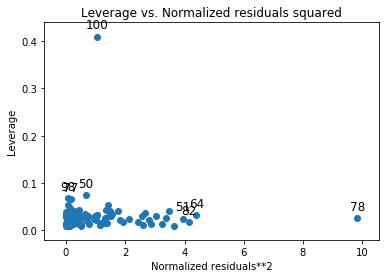

In [11]:
#statsmodels绘制杠杆等级，横轴为方差（代表离散情况），竖轴为杠杆等级
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig = plot_leverage_resid2(result_smf_new)

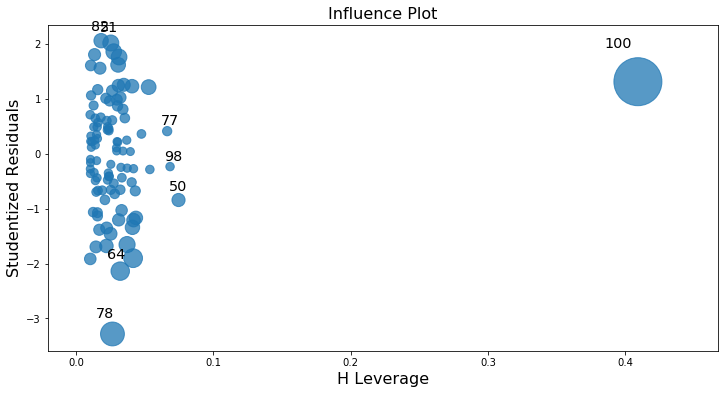

In [12]:
#statsmodels绘制杠杆等级方式2，横轴为杠杆等级，竖轴为学生化残差（代表离散情况）
fig, ax = plt.subplots(figsize=(12,6))
fig = sm.graphics.influence_plot(result_smf_new, ax=ax)

**对模型C为杠杆点，非离散点**

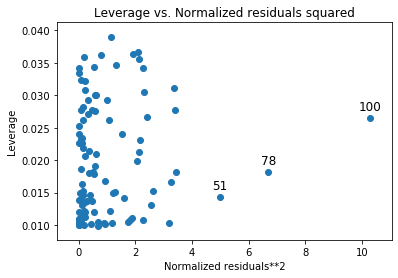

In [13]:
#statsmodels绘制杠杆等级，横轴为方差（代表离散情况），竖轴为杠杆等级
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig = plot_leverage_resid2(result_smf_x1_new)

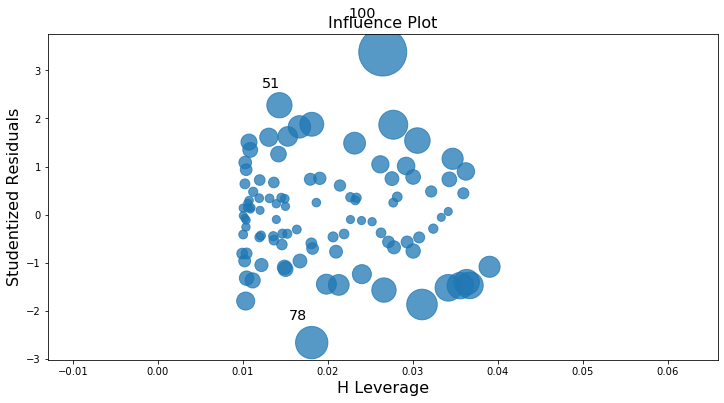

In [14]:
#statsmodels绘制杠杆等级方式2，横轴为杠杆等级，竖轴为学生化残差（代表离散情况）
fig, ax = plt.subplots(figsize=(12,6))
fig = sm.graphics.influence_plot(result_smf_x1_new, ax=ax)

**对模型D为离散点，非杠杆点**

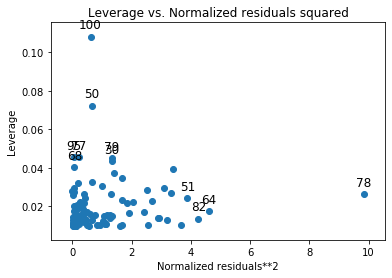

In [15]:
#statsmodels绘制杠杆等级，横轴为方差（代表离散情况），竖轴为杠杆等级
fig = plot_leverage_resid2(result_smf_x2_new)

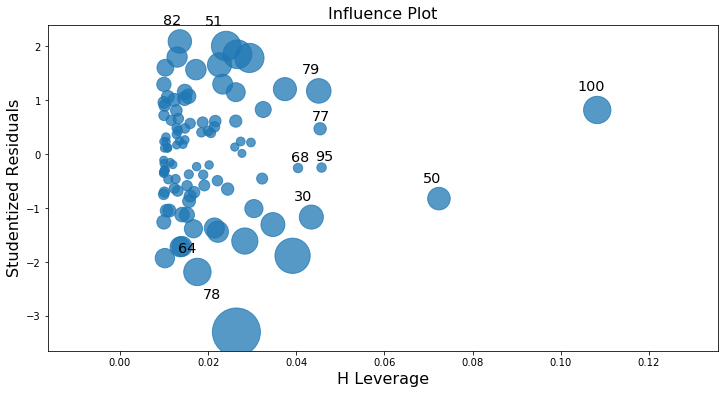

In [16]:
#statsmodels绘制杠杆等级方式2，横轴为杠杆等级，竖轴为学生化残差（代表离散情况）
fig, ax = plt.subplots(figsize=(12,6))
fig = sm.graphics.influence_plot(result_smf_x2_new, ax=ax)

**对模型E为杠杆点，非离散点**

In [17]:
#备注：杠杆点判断
print('(p+1)/n :',(1+1)/len(data_new))

(p+1)/n : 0.019801980198019802
